In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_csv('Wine_quality.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
y_df = wine_df['quality']

<AxesSubplot: >

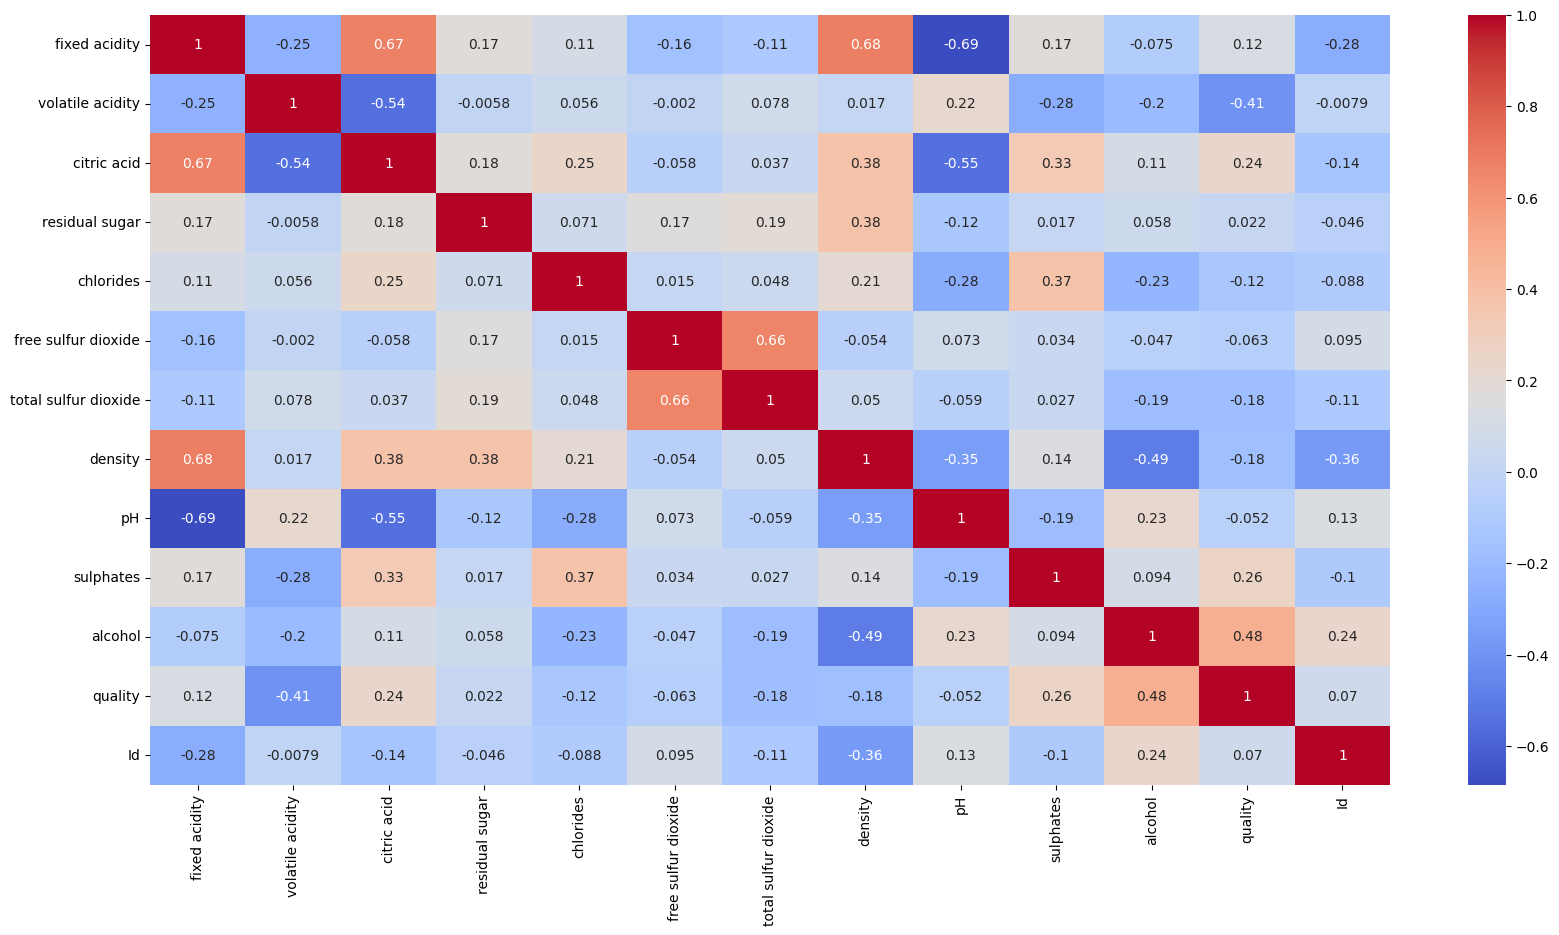

In [6]:
correlation = wine_df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlation , annot = True, cmap = 'coolwarm')

In [7]:
X_df = wine_df[['volatile acidity', 
             'citric acid',
             'chlorides',
             'pH',
             'alcohol',
             'sulphates']]

In [8]:
from sklearn.model_selection import train_test_split as tts

In [9]:
X_train, X_test, y_train ,y_test = tts(X_df, y_df, test_size = 0.2, random_state = 2)

# OLS Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = reg.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_score(y_test, y_pred)

0.40908416333837727

In [16]:
final_ans = pd.DataFrame()
final_ans['y_testing'] = y_test
final_ans['y_prediction'] = y_pred
final_ans

,y_testing,y_prediction
835,5,6.020564
226,5,5.993916
199,6,5.841615
158,5,5.268891
597,7,6.285206
...,...,...
86,5,5.248828
164,6,5.611275
99,5,5.093968
286,5,5.067492


# Batch Gradient Descent

In [17]:
class GDRegressor:
    
    def __init__(self, learning_rate = 0.1, epochs = 100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, X_train, y_train):
        # init your coefficients
        self.intercept_ = 0;
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            #intercept
            y_hat = self.intercept_ + np.dot(X_train, self.coef_)
            
            intercept_dev = (-2) * np.mean(y_train - y_hat) 
            self.intercept_ = self.intercept_ - (self.lr * intercept_dev)
            
            #coefficient 
            
            coef_dev = (-2/X_train.shape[0]) * np.dot((y_train - y_hat), X_train )
            self.coef_ = self.coef_ - (self.lr * coef_dev)
        
        print(self.intercept_, self.coef_)
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [18]:
bgd = GDRegressor(learning_rate = 0.001, epochs = 150) 

In [19]:
bgd.fit(X_train, y_train)

-0.08308998680704446 [0.93838452 0.98163431 0.99067904 0.71952972 0.18225822 0.94599565]


In [20]:
y_pred1 = bgd.predict(X_test)
y_pred1

array([5.58055038, 5.71291464, 5.37879787, 5.34490073, 5.31342976,
       5.44484191, 5.79669348, 5.65371162, 6.6534846 , 5.5858023 ,
       5.43874203, 5.41061164, 5.64862561, 5.6102421 , 5.61042705,
       5.35206147, 5.2392523 , 5.91152697, 5.44881307, 6.12808565,
       6.17257653, 5.46619591, 5.30688078, 6.75993733, 5.75434671,
       5.73136533, 6.10098991, 5.43214488, 5.37337377, 5.44848674,
       6.26739059, 5.298102  , 5.23569631, 5.98542271, 5.58168832,
       5.46774677, 5.39260794, 5.12620565, 5.26253563, 5.9656928 ,
       5.89807877, 5.32199701, 5.91985654, 5.45455517, 5.36735062,
       6.25556373, 5.72139239, 5.5315107 , 6.1833173 , 5.50810002,
       6.17376543, 5.44878526, 5.2729789 , 6.21199513, 5.63001112,
       5.31696733, 5.41389076, 5.71416025, 5.35781315, 5.94716646,
       6.01824976, 5.46874517, 5.85056847, 6.3569515 , 5.80021377,
       5.42887192, 5.8286723 , 5.53889861, 5.57961438, 5.46595501,
       5.48587292, 5.94060731, 5.81417534, 6.00498239, 5.65360

In [21]:
r2_score(y_test, y_pred1)

0.1259342645798791

# SGD Regressor

In [22]:
from sklearn.linear_model import SGDRegressor

In [23]:
reg = SGDRegressor(max_iter = 100,
                   learning_rate = 'constant',
                   eta0 = 0.01)

In [24]:
reg.fit(X_train, y_train)

SGDRegressor(learning_rate='constant', max_iter=100)

In [25]:
y_pred1 = reg.predict(X_test)

In [27]:
r2_score(y_test, y_pred1)

0.2531840312755872

In [34]:
reg.predict((X_test.to_numpy())[0].reshape(1,6))

C:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([5.69006798])

In [32]:
(X_test.to_numpy())[0]

array([ 0.39 ,  0.43 ,  0.068,  3.19 , 11.4  ,  0.46 ])

# SGD Regressor Code

In [83]:
class SGDRegressor:
    
    def __init__(self, learning_rate= 0.01, epochs = 100):
        self.intercept_ = None
        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self, X_train, y_train):
        
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
       
    
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                
                idx = np.random.randint(0, X_train.shape[0])
                y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_

                intercept_der = (-2) * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat), (X_train[idx]))
                self.coef_ = self.coef_ - (self.lr * coef_der)
                
        
        print (self.intercept_, self.coef_)
        
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [84]:
sgd= SGDRegressor_(learning_rate = 0.01, epochs = 100)

In [85]:
sgd.fit((X_train.to_numpy()), (y_train.to_numpy()))

ValueError: shapes (1,1) and (6,1) not aligned: 1 (dim 1) != 6 (dim 0)

In [77]:
(X_train.to_numpy()).shape

(914, 6)

In [46]:
(y_train.to_numpy().reshape(914,1))[5]

array([6], dtype=int64)